# Objective: Introduction to Time Series using Deep Learning
### Contents:
#### 1. Prerequisites
##### 1.1. Scaling (Standard_Scaler)/ Why do we use it? 
##### 1.2. Introduction to RNN and LSTM-RNN Architecture ( Input_Shape, Time_Steps, Dropout, TimeDistributed_Step, Repeat_vector, Early_Stopping Callback, etc....)
##### 1.3. Other popular Time_Series_Models
##### 1.4. Today's agenda i.e., Detecting anomalies Using LSTM-RNN AutoEncoder
#### 2. Application of Time Series Modeling
#### 3. Obtaining Stock Data
#### 4. Preprocessing Data (Splitting, Scaling and Visualization)
#### 5. Building our Model
#### 6. Analysing the Results of our Model

# 1.1. What is Feature scaling and how does it help in Deep Learning?
#### Standard Scaler
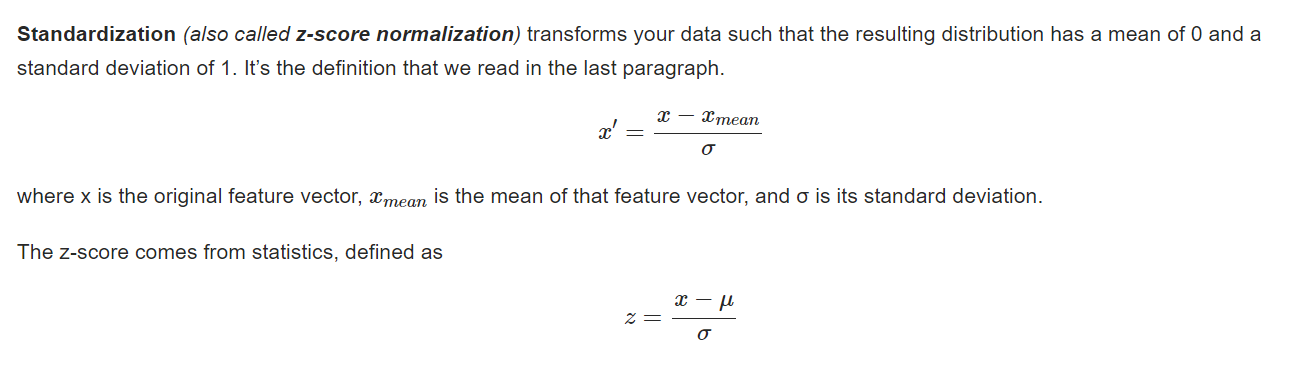



# Distribution of data before scaling and after scaling
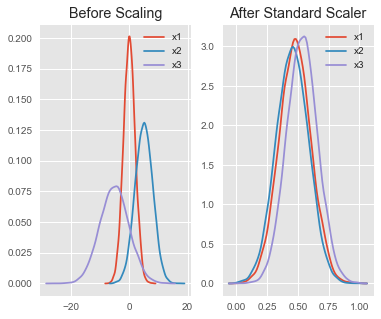

# Why scaling matters?
This is because θ will descend quickly on small ranges and slowly on large ranges. 
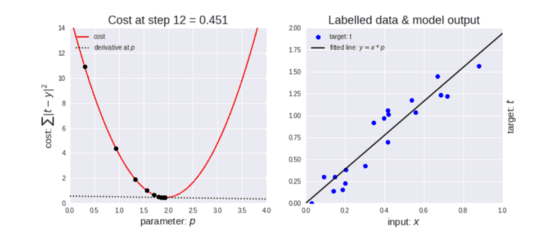
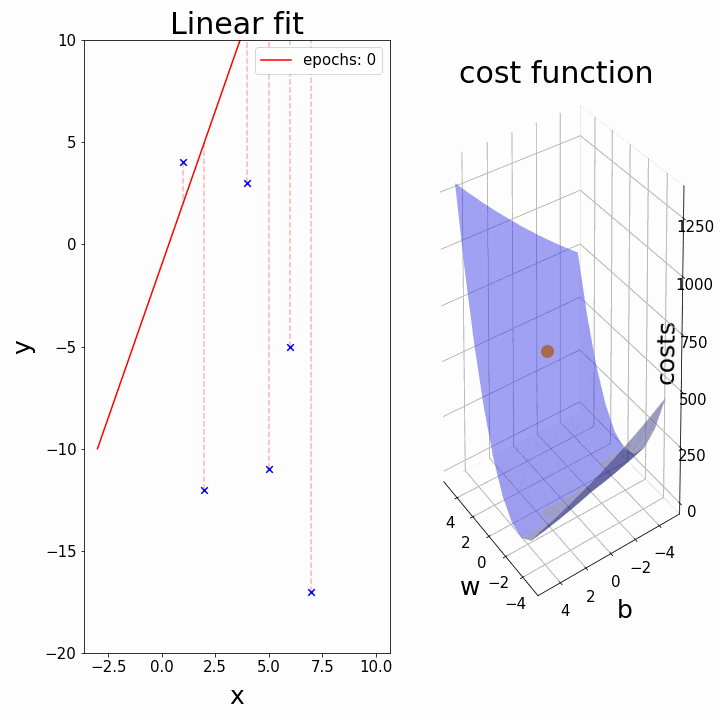


# Basic operations of a Recurrent Neural Network:
## 1. Feeding the input information into the neural network and making a prediction.
## 2. Calculating loss by comparing the predictions with the ground truth.
## 3. Backpropagating the loss back into the network and adjsuting weights.
## This where RNN's fail to capture long term dependencies and LSTM come into the picture. Also known as the vanishing gradient problem.

# RNN allows for next subsequent cells to carry information from previous hidden states. Applications:
### 1. Context identification in NLP
### 2. Processing long sequence data but ( there is issue of Long term dependency)
### 3. Machine Translation
### 4. Speech Recognition

# Difference Between a typical Neural Network and Recurrent Neural Network
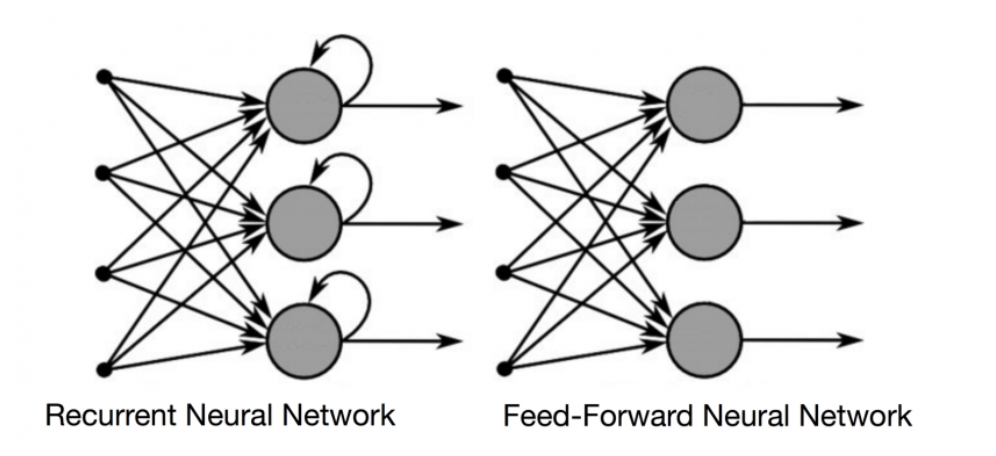



# RNN Architecture Intuition
## Notice that as we proceed further into the Neural network the importance of the words from initial layers decrease very fast and this where LSTM's step in to solve this issue.
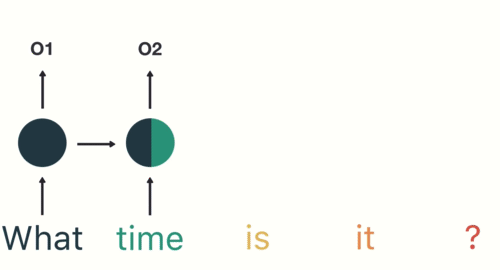

# Consider the following example
# Sentence 1: The **player** was exhausted and decided to go out for a **drink**.
# Sentence 2: The **players** were exhausted and decided to go out for **drinks**.

## Notice how a single change at the end of the senetence will lead to a change in the start.
# Vanishing Gradient Problem:
RNN's are good at recognizing context but only for very short range. This is because during backpropagation when weights are readjusted, they grow exponentially smaller and smaller and as a result the starting layers of the Network are not updated. This is why we need LSTM and we will discuss below, how.


#1.2. LSTM-RNN Architecture
#### **LSTM-RNN** takes an input shape of [Samples, Time_steps, Features]
#### **No of samples** are the total number of data points in your train data. Example: If you want to train your data on stocks prices from past 100 days. Samples=100.
#### **Time_Steps** indicate how far back do you want to look in your data to make a prediction. Example a time_step of 30 would indicate that for every prediction you make, the LSTM model will consider the data from the past 30 days and consider that trend. This is what context is all about.
#### **Note:** The idea of time steps makes it possible to extend the idea of LSTM also for Natural language Processing.
#### **Dropout** This is sub module of tensorflow.keras
#### This helps to reduce overfitting and generalise better on test data. pLease refer the GIF below.
[link text](http://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif)
#### **Repeat_Vector** TimeDistributedDense applies a same Dense (fully-connected) operation to every timestep.
#### **Repeat_Vector** will repeat the sequences n times. As we are considering the trend of past n days/time_period. This is done so as to feed the embedding vector into each time_step LSTM cell in the decoder part. ** This is sub module of tensorflow.keras
#### **TimeDistributed Layer** Sub-module of tensorflow.keras 
##### It's function in our case is to predict 1 output. Similar to what the Dense(1) layer would do.
#### **Early_Stopping_Callback**
##### This Callback helps to prevent overfitting on train data and better generalise for test data. Consider the example shown below.
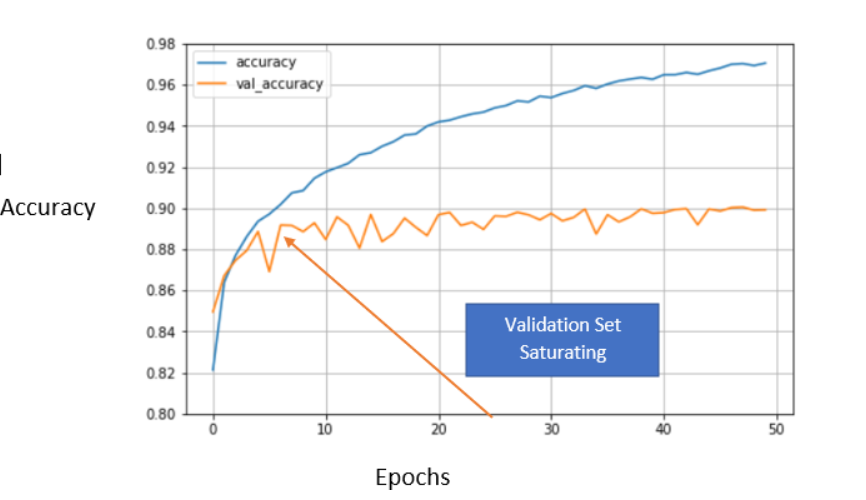








## LSTM-RNN Cell
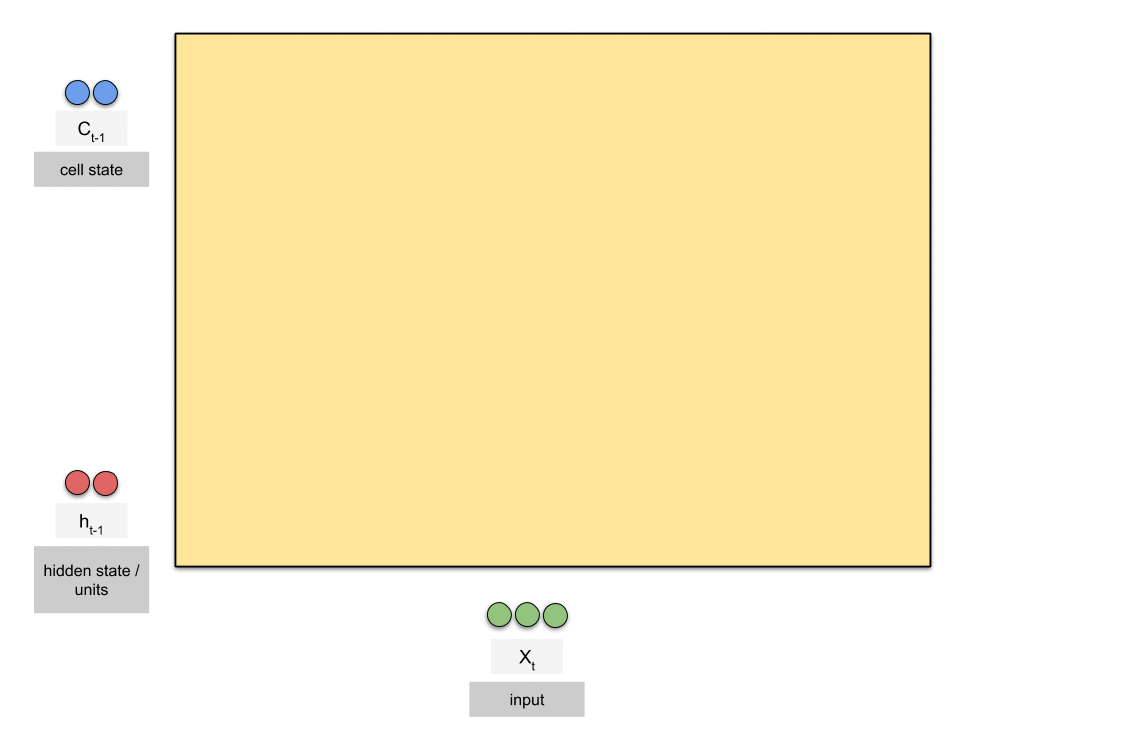
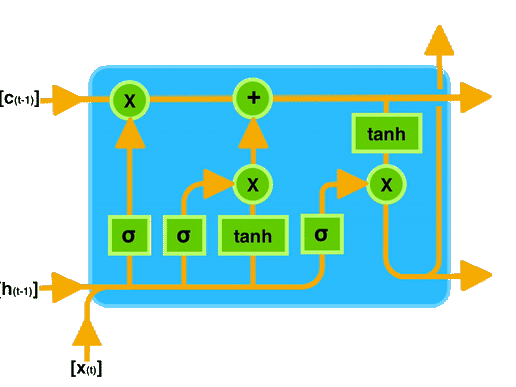

# Encoder Decoder Overview (Final Model)
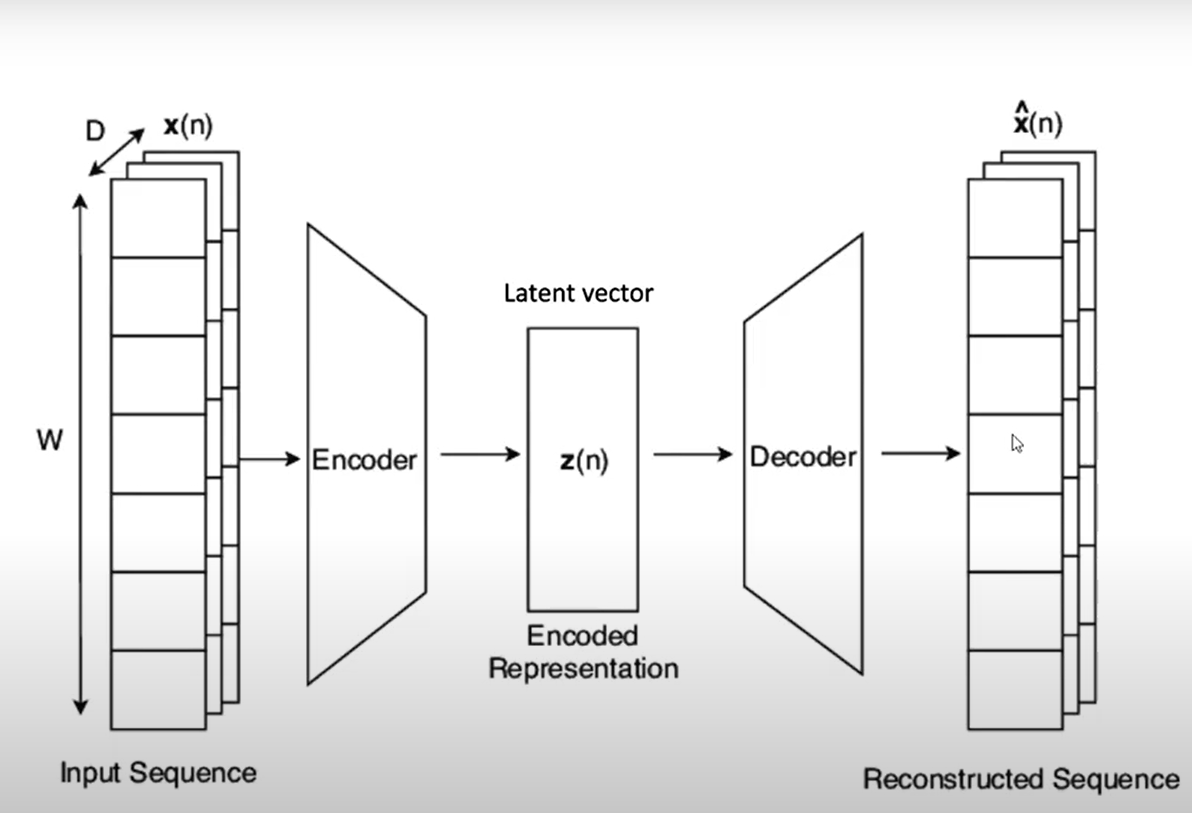

# Some other popular time series models are:
## Note: Most of these models are used primarily in Finance
## ARIMA (Autoregressive integrated moving average)
## SARIMA (Seasonal Autoregressive Integrated Moving Average)
## TBATS ( Trigonometric,Box_Cox Transformation,ARMA,Trend,Seasonality)
## Prophet
## ARCH (Auto Regressive Conditional Heteroscedasticity)
## GARCH (Generalized Autoregressive Conditional Heteroscedasticity )
## Transformers ( Deep learning)

# 2. Applications:

- Financial Analysis − It includes sales forecasting, inventory analysis, stock market analysis, price estimation. Widely used in Quantitative Finance ( Ex: Hedge fund Quants)

- Natural Language Processing. Helps in understanding context.

- Weather Analysis − It includes temperature estimation, climate change, seasonal shift recognition, weather forecasting.

- Network Data Analysis − It includes network usage prediction, anomaly or intrusion detection, predictive maintenance.

- Healthcare Analysis − It includes census prediction, insurance benefits prediction, patient monitoring.

# Mounting Google Drive to access our Data

In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install livelossplot
from livelossplot import PlotLossesKeras
import plotly.graph_objects as go

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

# 3. Obtaining Stock Data:

- Primary Source to obtain Stock Data is through Yahoo Finance. Since, today we will be working on Stock Data we will use yahoo finance as our source. 
Link: https://in.finance.yahoo.com/quote/HDFCBANK.NS/history?p=HDFCBANK.NS&.tsrc=fin-srch

- Select your time frame and Download csv file
- Other way is to use yahoo finance API. Refer here : https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

# Importing our Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HDFCBANK.NS (3).csv')
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].min(), df['Date'].max()
df=df.dropna()

**NOTE:** df.dropna() is very important as it will delete all the rows that have null values. Since the Equity market has some holidays throughtout the calendar year. Keeping null values in your data will affect the model. Make sure all null values are removed prior to further processing.

# Visualizing our Data

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close price'))
fig.update_layout(showlegend=True, title='HDFC Bank NSE Stock Price 1996-2020')
fig.show()

# 4. Preprocessing our data

# Splitting the Data into Train and Test

In [ ]:
train, test = df.loc[df['Date'] <= '2018-01-01'], df.loc[df['Date'] > '2018-01-01']
train.shape, test.shape

((5439, 2), (663, 2))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['Date'], y=train['Close'], name='Train_Data'))
fig.add_trace(go.Scatter(x=test['Date'], y=test['Close'], name='Test_Data'))
fig.update_layout(showlegend=True, title='HDFC Bank NSE Stock Price 1996-2020')
fig.show()

# Scaling helps in better convergence when Gradient Descent Algorithms are applied to find ideal solutions.

# Scaling our Data

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Scaled Train Data Plot

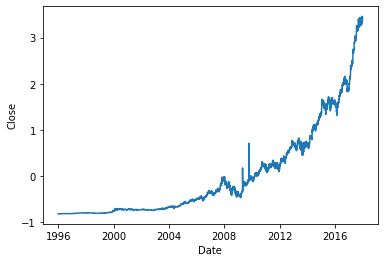

In [ ]:
sns.lineplot(x=train.Date,y=train.Close)

# Scaled Test Data Plot

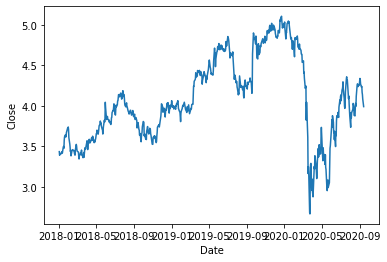

In [ ]:
sns.lineplot(x=test.Date,y=test.Close)

# Creating a time step to feed into our LSTM network

In [ ]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['Close']], train['Close'])
X_test, y_test = create_sequences(test[['Close']], test['Close'])

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (5409, 30, 1)
Testing shape: (633, 30, 1)


# Visual Representation of how we are creating our input sequences from the code above:
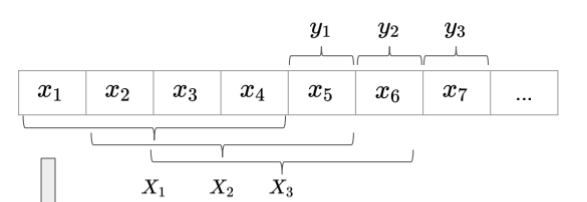

# 5. Defining our Model

In [ ]:
model = Sequential()
# Encoder
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))

# Bridge Between the Enocder and the Decoder
model.add(RepeatVector(X_train.shape[1]))

# Decoder
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))

# Output
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

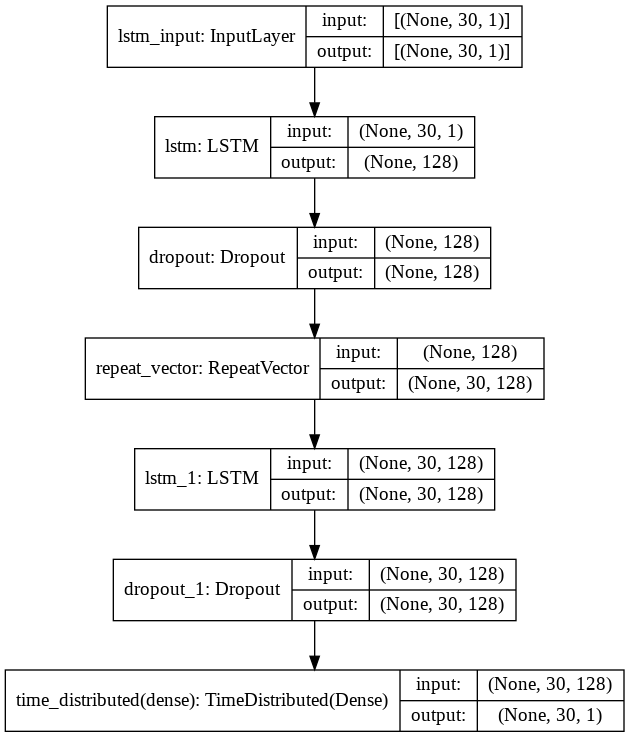

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**NOTE/ OBSERVATION**
## Possible Doubt:
### 1. You may ask, "Why the LSTM shape does not contain the sample shape as mentioned above i.e., [sample, Time_steps, Features ] ?"
### This is because python gives you the flexibility in number of samples and internally the shape is recognized as [batch_size, Time_steps, Features]
### If you want to input Samples you can use LSTM(batch_input_shape=[samples, Time_steps, Features]) 
### but this will force you to have same number of samples in your train and test data.

# Training our model
### - PlotLossesKeras for plotting our loss

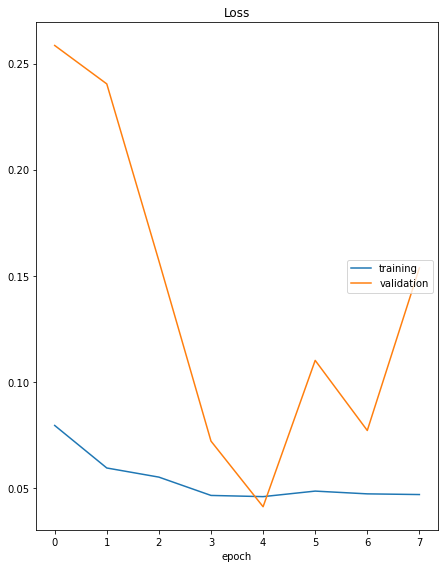

Loss
	training         	 (min:    0.046, max:    0.079, cur:    0.047)
	validation       	 (min:    0.041, max:    0.259, cur:    0.154)


In [ ]:
c1=PlotLossesKeras()
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1,
                    callbacks=[c1,keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Reconstruction error threshold: 0.5776060089646603


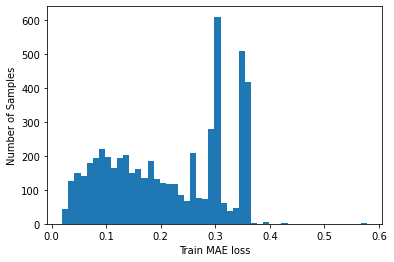

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

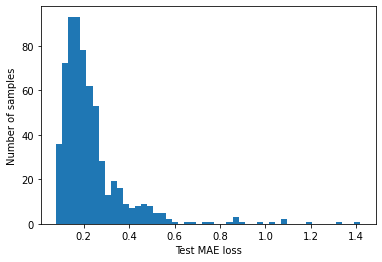

In [ ]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

# 6. Analysing the results

In [ ]:
test_score_df = pd.DataFrame(test[TIME_STEPS:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['Close'] = test[TIME_STEPS:]['Close']

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [ ]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies

Date     Close      loss  threshold  anomaly
6103 2020-03-13  4.046011  0.582062   0.577606     True
6105 2020-03-17  3.613590  0.666846   0.577606     True
6106 2020-03-18  3.165187  0.772510   0.577606     True
6107 2020-03-19  3.250347  1.040314   0.577606     True
6108 2020-03-20  3.192356  1.092695   0.577606     True
6109 2020-03-23  2.684135  1.080237   0.577606     True
6110 2020-03-24  2.666555  1.325344   0.577606     True
6111 2020-03-25  3.073177  1.418050   0.577606     True
6112 2020-03-26  3.275689  1.194292   0.577606     True
6113 2020-03-27  3.290986  0.979074   0.577606     True
6114 2020-03-30  2.958565  0.860397   0.577606     True
6115 2020-03-31  3.096693  0.898522   0.577606     True
6116 2020-04-01  2.949433  0.876172   0.577606     True
6117 2020-04-03  2.877286  0.853844   0.577606     True
6118 2020-04-07  3.252858  0.870665   0.577606     True
6119 2020-04-08  3.219981  0.735978   0.577606     True
6120 2020-04-09  3.385050  0.679681   0.577606     True
6121 2020-04-13  3.249433  0.604508   0.577606     True

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=scaler.inverse_transform(test_score_df['Close']), name='Close price'))
fig.add_trace(go.Scatter(x=anomalies['Date'], y=scaler.inverse_transform(anomalies['Close']), mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

# So was our model able to detect anomalies in the Stock Price of HDFC Bank? 
## As you may have already noticed that the model was able to capture the sudden price drop that happened in March 2020 and the subsequent reaction from the market in great detail. However, this is just a simple model and many improvements can be made.
# I would like to thank you for your time. 